# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report



### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [ ]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
print(len(trainset), len(testset))
# print(trainset[0][0])
# print(trainset[0][1])

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000 10000


In [ ]:
# trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64
#                                                     , shuffle=True, num_workers=2)
# trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
#                                                      , shuffle=True, num_workers=2)
# testloader = #TODO

trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True, num_workers=2)
len(trainloader_minibatch)

938

In [ ]:
pbar = tqdm(total=len(trainloader_minibatch))
for idx, (data,label) in enumerate(trainloader_minibatch):
    print(idx,data.size(),label.size())
    # print(data, label)
    pbar.update(1)
    break
pbar.refresh()

  0%|          | 1/938 [00:00<02:22,  6.59it/s]

0 torch.Size([64, 1, 28, 28]) torch.Size([64])


  0%|          | 1/938 [00:00<02:22,  6.59it/s]

True

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self,shape = 784, no_of_output=10):
        super(SimpleMLP,self).__init__()
        # code here
        self.dense1 = nn.Linear(shape, 400)
        self.relu1 = nn.ReLU()
        self.dense2 = nn.Linear(400, 200)
        self.relu2 = nn.ReLU()
        self.dense3 = nn.Linear(200, 50)
        self.relu3 = nn.ReLU()
        # self.dense4 = nn.Linear(100, 50)
        # self.relu4 = nn.ReLU()
        self.dense5 = nn.Linear(50, no_of_output)

    def forward(self,img):
        # code here
       
        # output = self.dense1(img.flatten())
        output = self.dense1(img.view(-1, 784))
        output = self.relu1(output)
        output = self.dense2(output)
        output = self.relu2(output)
        output = self.dense3(output)
        output = self.relu3(output)
        # output = self.dense4(output)
        # output = self.relu4(output)
        output = self.dense5(output)
        return output

# model = nn.Sequential()
# model.add_module("dense1", nn.Linear(img.shape[0]*img.shape[1], 400))
# model.add_module("relu1", nn.ReLU())
# model.add_module("dense2", nn.Linear(400, 200))
# model.add_module("relu2", nn.ReLU())
# model.add_module("dense3", nn.Linear(200, 50))
# model.add_module("relu3", nn.ReLU())
# model.add_module("dense3", nn.Linear(50, no_of_output))

### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [ ]:
mlp = SimpleMLP()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()
EPOCHS = 10
sgd_optimizer = optim.SGD(mlp.parameters(), lr=0.01)
sgd_optimizer_with_momentum = optim.SGD(mlp.parameters(), lr=0.1, momentum=0.7)
sgd_with_l2 = optim.SGD(mlp.parameters(), lr=0.1, weight_decay=0.01)
rmsprop = torch.optim.RMSprop(mlp.parameters(), lr=0.02, alpha=0.85,eps=1e-08, weight_decay=0, momentum=0.7, centered=False, foreach=None, maximize=False, differentiable=False)
adam = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

  0%|          | 0/10 [33:51<?, ?it/s]


Loss:  0.010552837513387203
Loss:  0.0027795012574642897
Loss:  0.0031579439528286457
Loss:  0.0004581649845931679
Loss:  0.007726316340267658
Loss:  0.004435781855136156
Loss:  6.214774475665763e-05
Loss:  0.0005643211770802736
Loss:  0.00042257155291736126
Loss:  0.00016285444144159555
[5, 3, 6, 5, 2, 5, 1, 5, 6, 9, 8, 1, 8, 6, 9, 0, 2, 9, 8, 4, 6, 1, 2, 3, 9, 3, 7, 7, 0, 6, 9, 1, 3, 9, 0, 1, 3, 2, 1, 9, 5, 2, 3, 2, 5, 6, 0, 7, 8, 0, 4, 0, 9, 9, 4, 8, 0, 0, 8, 4, 0, 0, 5, 5, 2, 8, 6, 0, 3, 1, 3, 6, 0, 2, 7, 2, 0, 8, 2, 0, 7, 9, 7, 6, 2, 4, 0, 5, 7, 3, 6, 7, 1, 1, 1, 4, 7, 8, 3, 1, 5, 2, 2, 0, 1, 1, 3, 7, 9, 9, 5, 0, 4, 5, 5, 1, 6, 6, 5, 7, 9, 3, 3, 1, 0, 8, 5, 6, 3, 0, 9, 3, 0, 0, 3, 9, 6, 7, 9, 2, 9, 7, 9, 3, 8, 4, 5, 2, 7, 3, 6, 1, 4, 6, 2, 4, 3, 7, 3, 4, 9, 7, 8, 4, 5, 2, 2, 2, 0, 6, 5, 9, 1, 0, 1, 7, 2, 2, 5, 9, 4, 8, 1, 7, 9, 2, 1, 1, 2, 4, 7, 8, 7, 5, 7, 4, 9, 4, 5, 2, 4, 0, 7, 4, 8, 1, 3, 1, 1, 2, 7, 2, 6, 6, 0, 2, 3, 2, 5, 8, 2, 1, 1, 4, 4, 3, 2, 9, 7, 3, 2, 4, 6, 4, 2, 2, 5,

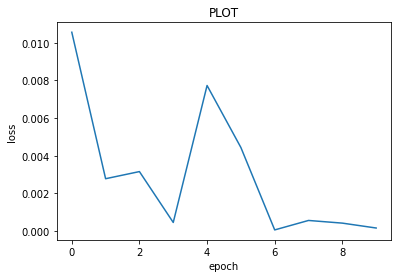

In [ ]:
loss_c = nn.CrossEntropyLoss()
 
# Define the SGD optimizer with a learning rate of 0.01
optimizer = optim.SGD(mlp.parameters(), lr=0.01)
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
print("Confusion matrix :", confusion_matrix(y_real, y_pred))
print("classification_report matrix :", classification_report(y_real, y_pred))

plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()



  0%|          | 0/10 [00:36<?, ?it/s]


Loss:  1.009235143661499
Loss:  0.6737010478973389
Loss:  0.8402082324028015
Loss:  0.5188215374946594
Loss:  0.19030319154262543
Loss:  0.6751284003257751
Loss:  0.42783743143081665
Loss:  0.6427085995674133
Loss:  0.223990336060524
Loss:  0.612947940826416
[1, 8, 1, 7, 8, 7, 6, 7, 5, 7, 2, 7, 9, 0, 6, 8, 4, 9, 3, 2, 0, 8, 6, 6, 1, 6, 6, 1, 6, 6, 3, 8, 8, 7, 2, 1, 8, 0, 3, 1, 7, 2, 6, 0, 3, 1, 6, 6, 7, 6, 3, 6, 9, 6, 6, 7, 5, 7, 5, 0, 8, 1, 0, 2, 9, 4, 3, 9, 5, 0, 5, 9, 3, 8, 9, 8, 7, 7, 0, 1, 3, 8, 6, 1, 2, 5, 7, 0, 7, 8, 2, 4, 8, 9, 4, 2, 5, 0, 1, 7, 9, 2, 3, 1, 9, 9, 6, 9, 2, 0, 0, 7, 7, 8, 6, 6, 0, 8, 4, 1, 1, 1, 6, 0, 1, 9, 3, 9, 4, 8, 1, 3, 3, 7, 6, 8, 9, 4, 2, 8, 1, 1, 6, 5, 8, 5, 7, 5, 8, 1, 3, 8, 0, 0, 2, 8, 4, 4, 7, 7, 3, 2, 4, 6, 2, 6, 0, 1, 0, 1, 6, 2, 2, 9, 0, 3, 0, 5, 0, 3, 6, 0, 1, 7, 7, 1, 7, 6, 9, 7, 1, 7, 0, 4, 2, 7, 1, 5, 1, 3, 7, 6, 3, 1, 8, 4, 3, 9, 7, 4, 2, 4, 6, 3, 6, 7, 3, 5, 8, 2, 1, 8, 8, 5, 6, 0, 6, 4, 8, 6, 5, 8, 1, 1, 2, 4, 9, 4, 8, 1, 6, 3, 3, 1, 1, 3, 6,

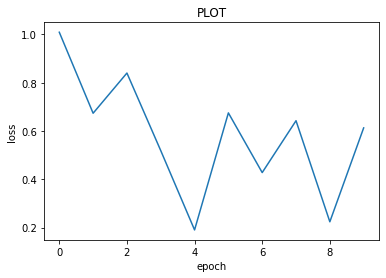

In [ ]:
loss_c = nn.CrossEntropyLoss()
 
# Define the SGD optimizer with a learning rate of 0.01
optimizer = optim.SGD(mlp.parameters(), lr=0.01)
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_stochastic:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
print("Confusion matrix :", confusion_matrix(y_real, y_pred))
print("classification_report matrix :", classification_report(y_real, y_pred))

plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()




  0%|          | 0/10 [00:57<?, ?it/s]


Loss:  0.2780899405479431
Loss:  0.12182734161615372
Loss:  0.04625315964221954
Loss:  0.031086402013897896
Loss:  0.05465677008032799
Loss:  0.043875690549612045
Loss:  0.01240498572587967
Loss:  0.14113439619541168
Loss:  0.002042615320533514
Loss:  0.0022447204682976007
[7, 4, 5, 2, 4, 7, 1, 0, 1, 3, 9, 7, 6, 9, 5, 0, 0, 4, 4, 8, 4, 9, 3, 1, 3, 0, 3, 6, 5, 5, 8, 2, 1, 6, 9, 7, 2, 4, 9, 6, 8, 3, 1, 9, 6, 2, 2, 3, 2, 2, 0, 8, 9, 9, 8, 7, 6, 2, 6, 0, 5, 6, 4, 5, 6, 6, 9, 9, 9, 8, 5, 4, 9, 3, 8, 0, 1, 1, 7, 7, 7, 7, 8, 2, 9, 0, 7, 0, 2, 6, 9, 5, 1, 4, 7, 8, 6, 6, 3, 7, 2, 7, 1, 9, 0, 1, 9, 6, 2, 1, 6, 7, 5, 6, 3, 9, 5, 3, 8, 2, 5, 4, 6, 4, 9, 9, 8, 5, 3, 5, 0, 0, 1, 8, 0, 7, 8, 8, 7, 4, 7, 4, 7, 3, 0, 1, 3, 4, 0, 8, 5, 5, 2, 0, 7, 2, 7, 1, 3, 8, 1, 2, 9, 9, 3, 9, 6, 0, 8, 0, 1, 0, 5, 0, 1, 7, 0, 3, 7, 5, 3, 5, 9, 3, 9, 9, 9, 2, 6, 9, 7, 2, 0, 6, 2, 6, 3, 0, 5, 9, 7, 1, 1, 2, 4, 7, 4, 0, 0, 0, 2, 3, 8, 9, 9, 6, 7, 7, 0, 5, 0, 0, 3, 5, 3, 4, 0, 0, 1, 9, 3, 8, 2, 0, 7, 4, 0, 8, 3, 5, 9, 0,

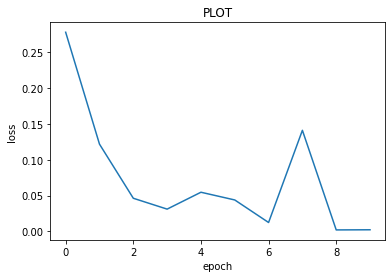

In [ ]:
loss_c = nn.CrossEntropyLoss()
 
optimizer = sgd_optimizer_with_momentum
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_stochastic:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
print("Confusion matrix :", confusion_matrix(y_real, y_pred))
print("classification_report matrix :", classification_report(y_real, y_pred))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()



  0%|          | 0/10 [00:42<?, ?it/s]


Loss:  0.0013732649385929108
Loss:  0.02363399788737297
Loss:  0.08740966767072678
Loss:  0.032664954662323
Loss:  0.1313173770904541
Loss:  0.09980501979589462
Loss:  0.2965983748435974
Loss:  0.08711550384759903
Loss:  0.26905906200408936
Loss:  0.10860949009656906
[2, 8, 9, 4, 0, 9, 2, 1, 6, 8, 1, 9, 3, 7, 0, 9, 9, 0, 5, 3, 7, 7, 7, 0, 2, 1, 8, 6, 7, 2, 7, 3, 9, 5, 2, 6, 6, 4, 8, 5, 6, 8, 2, 3, 2, 4, 8, 0, 6, 4, 8, 6, 2, 1, 4, 7, 7, 6, 1, 4, 1, 3, 8, 3, 0, 2, 1, 6, 3, 1, 2, 2, 4, 6, 6, 2, 7, 4, 4, 1, 7, 6, 8, 4, 1, 9, 9, 8, 2, 2, 2, 8, 9, 3, 9, 0, 9, 2, 2, 0, 7, 5, 0, 9, 3, 3, 5, 2, 0, 0, 9, 6, 9, 6, 1, 8, 2, 6, 2, 9, 9, 1, 4, 9, 2, 2, 8, 7, 2, 8, 5, 5, 7, 3, 1, 9, 0, 9, 1, 2, 2, 3, 2, 8, 8, 9, 5, 4, 4, 7, 3, 6, 1, 7, 9, 0, 9, 2, 0, 9, 9, 6, 1, 1, 2, 4, 9, 8, 3, 1, 5, 2, 6, 5, 1, 6, 6, 8, 2, 8, 1, 1, 6, 6, 9, 0, 1, 5, 0, 7, 7, 4, 4, 8, 9, 2, 1, 1, 6, 5, 1, 4, 3, 2, 1, 0, 2, 7, 2, 0, 2, 1, 3, 3, 6, 0, 9, 3, 7, 1, 8, 1, 3, 5, 9, 2, 8, 2, 7, 0, 6, 8, 6, 4, 9, 8, 2, 1, 1, 8, 9, 0, 3, 5,

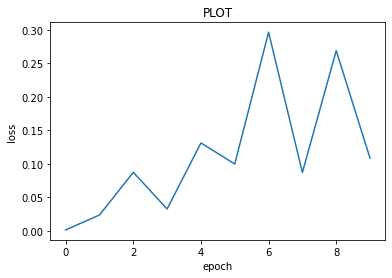

In [ ]:
loss_c = nn.CrossEntropyLoss()
 
optimizer = sgd_with_l2
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_stochastic:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
print("Confusion matrix :", confusion_matrix(y_real, y_pred))
print("classification_report matrix :", classification_report(y_real, y_pred))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()


  

  0%|          | 0/10 [04:38<?, ?it/s]


Loss:  2.397570848464966
Loss:  1.9480645656585693
Loss:  2.0212888717651367
Loss:  2.01595139503479
Loss:  2.1041741371154785
Loss:  1.9162625074386597
Loss:  1.8272953033447266
Loss:  2.2233779430389404
Loss:  1.9689598083496094
Loss:  2.06595516204834
[9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 1, 9, 1, 9, 9, 9, 9, 7, 9, 7, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 1, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 7, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

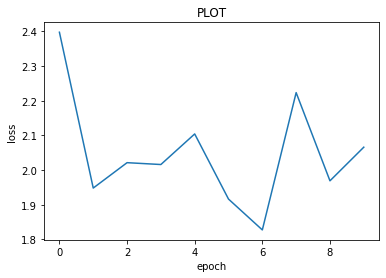

In [ ]:
loss_c = nn.CrossEntropyLoss()
 
optimizer = torch.optim.RMSprop(mlp.parameters(), lr=0.02, alpha=0.90,eps=1e-07, weight_decay=0, momentum=0.8, centered=False, foreach=None, maximize=False, differentiable=False)
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in testloader:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
print("Confusion matrix :", confusion_matrix(y_real, y_pred))
print("classification_report matrix :", classification_report(y_real, y_pred))

plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()



  0%|          | 0/10 [00:35<?, ?it/s]


Loss:  0.018991028890013695
Loss:  0.22785860300064087
Loss:  0.06647950410842896
Loss:  0.2404799908399582
Loss:  0.013504750095307827
Loss:  0.010581799782812595
Loss:  0.02384868450462818
Loss:  0.24665427207946777
Loss:  0.022027403116226196
Loss:  0.017315153032541275
[4, 5, 7, 2, 3, 4, 7, 4, 7, 2, 1, 3, 5, 3, 2, 9, 6, 9, 4, 4, 0, 1, 1, 9, 1, 4, 9, 9, 2, 5, 5, 7, 3, 0, 8, 9, 5, 3, 2, 1, 7, 1, 9, 8, 1, 2, 3, 8, 5, 1, 9, 5, 4, 5, 6, 6, 6, 4, 9, 9, 0, 3, 5, 0, 6, 7, 4, 2, 9, 7, 6, 3, 6, 4, 2, 7, 1, 2, 9, 3, 4, 0, 9, 8, 8, 4, 0, 3, 2, 0, 6, 6, 9, 2, 8, 1, 6, 5, 9, 4, 6, 5, 3, 3, 2, 9, 2, 6, 1, 2, 0, 6, 4, 4, 2, 7, 1, 3, 6, 9, 3, 8, 1, 7, 0, 0, 2, 8, 3, 7, 6, 6, 8, 8, 7, 7, 7, 2, 6, 6, 1, 2, 8, 5, 4, 1, 3, 9, 8, 1, 0, 8, 2, 6, 2, 2, 3, 5, 0, 6, 0, 6, 1, 6, 0, 7, 4, 4, 8, 6, 4, 7, 5, 3, 7, 8, 3, 0, 9, 9, 5, 3, 7, 5, 7, 1, 9, 2, 7, 8, 9, 6, 9, 1, 0, 7, 9, 3, 2, 0, 7, 2, 8, 5, 7, 7, 6, 6, 1, 1, 7, 9, 5, 5, 6, 6, 1, 1, 5, 4, 9, 1, 7, 2, 5, 5, 3, 1, 9, 6, 7, 0, 0, 0, 6, 2, 5, 6, 8, 4, 0, 7,

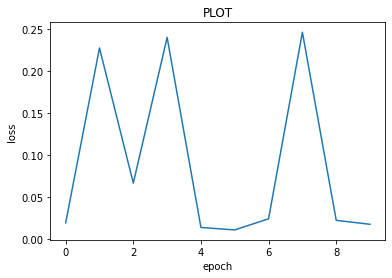

In [ ]:
loss_c = nn.CrossEntropyLoss()
 
optimizer = rmsprop
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()




  0%|          | 0/10 [03:38<?, ?it/s]


Loss:  0.374128133058548
Loss:  0.015979724004864693
Loss:  0.001662202412262559
Loss:  0.023677829653024673
Loss:  0.0005736268358305097
Loss:  9.996003063861281e-05
Loss:  0.0003412938676774502
Loss:  0.00019237928790971637
Loss:  0.0028332252986729145
Loss:  0.00012515205889940262
[5, 7, 7, 3, 9, 6, 3, 3, 3, 9, 7, 9, 4, 7, 3, 0, 8, 5, 5, 9, 1, 9, 7, 0, 4, 9, 9, 5, 2, 8, 6, 0, 5, 3, 2, 3, 5, 7, 5, 1, 1, 9, 9, 8, 8, 3, 2, 0, 0, 5, 0, 3, 7, 7, 2, 0, 9, 4, 0, 3, 4, 7, 1, 4, 7, 1, 6, 3, 0, 0, 9, 6, 0, 2, 0, 0, 3, 6, 2, 9, 1, 7, 4, 8, 5, 7, 6, 2, 8, 4, 9, 5, 4, 7, 7, 7, 4, 7, 8, 1, 2, 9, 9, 2, 5, 3, 2, 1, 2, 9, 7, 8, 8, 1, 6, 0, 4, 2, 5, 1, 3, 6, 7, 0, 3, 0, 0, 0, 5, 6, 9, 0, 4, 1, 5, 7, 2, 0, 2, 0, 9, 0, 6, 9, 3, 4, 8, 9, 9, 1, 8, 2, 4, 3, 8, 4, 3, 3, 4, 3, 6, 4, 4, 7, 2, 5, 5, 4, 7, 0, 2, 0, 1, 7, 8, 7, 3, 1, 2, 2, 1, 8, 0, 3, 5, 3, 7, 0, 3, 6, 4, 3, 7, 2, 7, 7, 0, 0, 9, 7, 1, 0, 8, 9, 2, 4, 4, 6, 0, 7, 1, 4, 9, 4, 6, 3, 4, 0, 7, 7, 2, 8, 7, 5, 7, 5, 5, 2, 6, 8, 4, 4, 8, 8, 0, 6, 6, 5, 

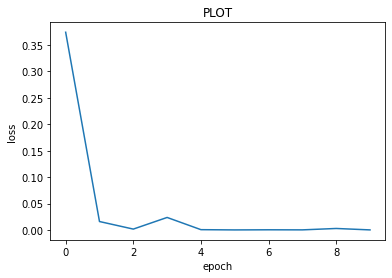

In [ ]:
loss_c = nn.CrossEntropyLoss()
 
optimizer = adam
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in testloader:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()



  0%|          | 0/10 [00:33<?, ?it/s]


Loss:  0.004737779963761568
Loss:  0.027661742642521858
Loss:  0.056633513420820236
Loss:  0.00013003205822315067
Loss:  0.001068584155291319
Loss:  0.00023469619918614626
Loss:  0.0010778512805700302
Loss:  0.0007260289276018739
Loss:  0.015207665041089058
Loss:  0.0012227504048496485
[3, 0, 8, 0, 4, 7, 6, 4, 1, 5, 1, 4, 2, 9, 9, 7, 4, 9, 3, 6, 9, 1, 8, 9, 0, 2, 2, 7, 2, 3, 7, 6, 9, 5, 9, 6, 6, 0, 4, 0, 5, 5, 9, 7, 9, 4, 7, 0, 6, 9, 7, 9, 0, 7, 8, 5, 6, 8, 6, 2, 8, 2, 7, 5, 6, 4, 6, 1, 4, 8, 6, 6, 0, 4, 9, 2, 9, 6, 6, 2, 0, 8, 8, 1, 8, 4, 6, 7, 2, 3, 1, 0, 2, 5, 3, 1, 6, 8, 9, 1, 6, 5, 0, 2, 8, 6, 3, 3, 2, 8, 2, 6, 7, 1, 1, 0, 2, 6, 9, 1, 3, 1, 7, 0, 4, 5, 1, 7, 7, 2, 1, 3, 6, 5, 4, 6, 0, 6, 2, 1, 6, 1, 1, 7, 7, 5, 2, 4, 9, 8, 7, 6, 6, 9, 5, 3, 4, 5, 9, 4, 9, 2, 2, 0, 8, 2, 2, 7, 2, 1, 1, 4, 9, 7, 0, 2, 5, 1, 6, 3, 8, 9, 3, 7, 3, 4, 8, 9, 2, 3, 4, 1, 3, 4, 5, 0, 1, 3, 5, 7, 3, 6, 4, 8, 5, 5, 7, 0, 6, 7, 3, 6, 1, 6, 4, 6, 7, 4, 4, 8, 2, 5, 2, 7, 3, 7, 2, 5, 7, 2, 6, 1, 6, 6, 3, 2, 0, 2

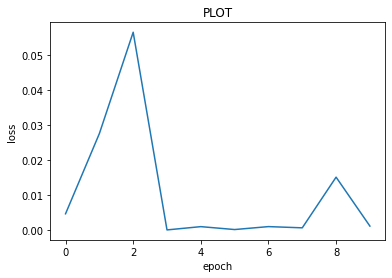

In [ ]:
loss_c = nn.CrossEntropyLoss()
 
optimizer = adam
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()



Adam performed the best.
Adam is an optimization algorithm that improves upon the RMSprop approach by also keeping a moving average of the gradient, in addition to the moving average of the squared gradient used by RMSprop. This combination of momentum and adaptive learning rate can lead to faster convergence and better minima, thereby improving the performance of the optimizer.

In [ ]:
# # sample code: need not rely on this
# from torchvision.transforms import ToTensor

# EPOCHS = 1

# train_loss = []
# val_loss = []

# loss = nn.CrossEntropyLoss()
# mlp = SimpleMLP() 
# # Define the SGD optimizer with a learning rate of 0.01
# sgd_optimizer = optim.SGD(mlp.parameters(row * col), lr=0.01)

# mlp.train()

# for epoch in range(EPOCHS):
#     pbar = tqdm(total=len(trainloader_minibatch))
#     out_loss = 0
#     for batch_idx, (data, target) in enumerate(trainloader_minibatch):
#         # data = ToTensor()(data).unsqueeze(0)
#         if torch.cuda.is_available():
#             data, target = data.cuda(), target.cuda()
        
#         out = mlp(data)
#         loss = loss(out, target)
#         out_loss += loss.cpu().data.item()
#         sgd_optimizer.zero_grad()
#         loss.backward()
#         sgd_optimizer.step()
#         pbar.update(1)
#         pbar.desc= f'Loss: {loss.item()}'
#     # train_loss.append(out_loss/len(trainloader))

# #     with torch.no_grad():
# #         out_loss = 0
# #         for batch_idx, (data, target) in enumerate(testloader):
# #             # do things
            
# #         val_loss.append(out_loss/len(testloader))
# #     print()
# #     pbar.refresh()
# #     pbar.close()

# # plot_losses(train_loss,val_loss)
# # final_metrics = get_metrics_somehow(mlp,trainloader,testloader)

### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.


  0%|          | 0/10 [02:35<?, ?it/s]


Loss:  0.12207162380218506
Loss:  0.12418615818023682
Loss:  0.08185790479183197
Loss:  0.004007166717201471
Loss:  0.003067209618166089
Loss:  0.1451321542263031
Loss:  0.000919527024962008
Loss:  0.002251911675557494
Loss:  4.808051744475961e-05
Loss:  0.0019049141556024551
[4, 4, 7, 3, 9, 3, 8, 5, 3, 9, 9, 3, 4, 6, 7, 5, 7, 9, 6, 0, 0, 7, 7, 9, 1, 7, 5, 0, 7, 3, 1, 8, 4, 1, 7, 2, 8, 9, 9, 3, 5, 2, 9, 2, 6, 1, 2, 1, 1, 0, 7, 3, 7, 5, 4, 4, 0, 2, 9, 3, 2, 2, 4, 9, 3, 5, 7, 7, 0, 1, 7, 2, 5, 2, 5, 7, 1, 9, 5, 1, 9, 7, 4, 5, 2, 0, 7, 1, 1, 4, 8, 4, 3, 9, 3, 7, 0, 3, 9, 6, 1, 6, 8, 8, 6, 8, 0, 6, 1, 0, 8, 9, 5, 9, 1, 2, 3, 7, 5, 9, 5, 4, 6, 3, 6, 9, 4, 2, 0, 8, 8, 4, 9, 9, 0, 7, 5, 1, 7, 8, 2, 8, 3, 6, 2, 0, 8, 7, 6, 5, 8, 1, 0, 5, 4, 0, 7, 9, 0, 2, 8, 2, 7, 6, 4, 1, 7, 0, 1, 9, 2, 9, 8, 1, 3, 7, 6, 3, 3, 2, 4, 6, 1, 4, 6, 8, 1, 0, 6, 3, 4, 4, 0, 8, 7, 9, 0, 7, 6, 1, 3, 1, 4, 1, 1, 2, 5, 2, 7, 6, 1, 6, 5, 8, 3, 8, 8, 6, 7, 2, 7, 7, 1, 3, 9, 3, 0, 4, 1, 1, 0, 2, 9, 3, 2, 6, 7, 1, 3, 3, 2,

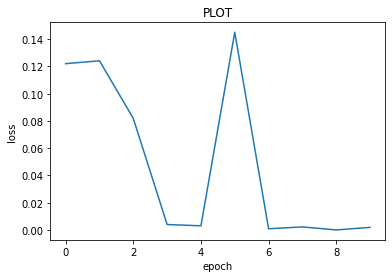

In [ ]:
# code and analysis here
import torch.optim.lr_scheduler as lr_scheduler

mlp = SimpleMLP()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()


loss_c = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

# scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.2)
# scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=0.1)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.85)

# def lr_lambda(epoch):
#     return 1 - (epoch / EPOCHS)
# scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)

lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()


  

  0%|          | 0/10 [02:59<?, ?it/s]


Loss:  0.0674474835395813
Loss:  0.0761977806687355
Loss:  0.03692719712853432
Loss:  0.01735723204910755
Loss:  0.008773360401391983
Loss:  0.00019599332881625742
Loss:  0.010684018023312092
Loss:  0.008325314149260521
Loss:  0.03563987463712692
Loss:  4.75571105198469e-05
[3, 2, 9, 2, 1, 7, 0, 8, 0, 5, 0, 8, 9, 2, 3, 7, 2, 9, 0, 8, 5, 6, 9, 8, 7, 9, 5, 4, 6, 0, 3, 4, 9, 7, 2, 9, 1, 4, 4, 2, 0, 4, 4, 6, 8, 6, 0, 8, 8, 8, 4, 9, 0, 0, 4, 0, 6, 6, 4, 9, 2, 4, 3, 2, 1, 0, 7, 9, 4, 1, 3, 9, 6, 1, 5, 7, 5, 8, 7, 0, 2, 9, 5, 3, 1, 6, 6, 4, 0, 2, 7, 7, 0, 9, 8, 9, 6, 2, 5, 9, 3, 9, 9, 2, 0, 8, 9, 9, 1, 4, 1, 8, 3, 9, 5, 4, 0, 0, 2, 3, 1, 8, 6, 5, 4, 5, 7, 8, 7, 9, 2, 0, 1, 2, 9, 1, 8, 1, 0, 6, 3, 8, 9, 5, 1, 5, 9, 8, 5, 0, 8, 7, 7, 6, 5, 7, 1, 3, 7, 6, 0, 1, 7, 8, 0, 8, 9, 7, 3, 5, 9, 6, 7, 1, 2, 3, 4, 3, 4, 7, 7, 9, 2, 4, 7, 8, 8, 6, 0, 1, 8, 8, 2, 1, 9, 2, 7, 1, 7, 9, 8, 6, 8, 1, 2, 0, 2, 4, 4, 5, 8, 3, 7, 5, 1, 2, 7, 5, 5, 2, 3, 4, 9, 2, 3, 1, 5, 1, 5, 4, 6, 7, 6, 6, 3, 5, 0, 3, 7, 5, 2, 8

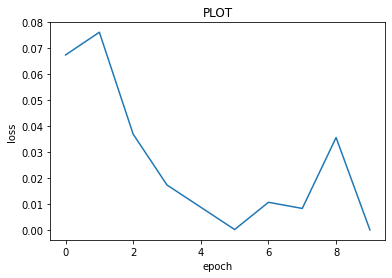

In [ ]:
mlp = SimpleMLP()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()


loss_c = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

# scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.1)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=0.1)
# scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# def lr_lambda(epoch):
#     return 1 - (epoch / EPOCHS)
# scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)

lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()


  0%|          | 0/10 [02:36<?, ?it/s]


Loss:  0.06570690125226974
13.06773368100005
Loss:  0.24806976318359375
13.161519211999916
Loss:  0.03685017302632332
13.933516656000052
Loss:  0.0016510728746652603
13.89626543899999
Loss:  0.009661868214607239
13.590432512000007
Loss:  0.0025361289735883474
13.75864070199998
Loss:  0.0008370257564820349
13.466101256000002
Loss:  0.005116977728903294
13.60801048799999
Loss:  0.00036202656337991357
13.684031609000044
Loss:  0.0038346312940120697
13.533100096999988
[9, 7, 8, 7, 2, 1, 8, 9, 5, 0, 5, 8, 5, 9, 7, 9, 1, 9, 0, 3, 1, 2, 7, 5, 6, 3, 1, 9, 4, 1, 3, 7, 9, 2, 2, 3, 0, 5, 1, 8, 9, 5, 1, 1, 2, 6, 2, 9, 4, 1, 4, 4, 6, 7, 2, 3, 3, 0, 7, 4, 0, 3, 1, 3, 2, 6, 4, 0, 4, 6, 9, 1, 8, 0, 4, 0, 2, 2, 5, 0, 4, 1, 6, 8, 0, 1, 0, 8, 9, 9, 9, 4, 4, 7, 5, 9, 1, 4, 7, 7, 5, 1, 2, 9, 7, 1, 4, 4, 0, 0, 2, 1, 5, 8, 4, 1, 9, 7, 3, 4, 3, 8, 9, 2, 1, 8, 9, 0, 9, 2, 5, 1, 4, 1, 6, 5, 8, 2, 7, 4, 5, 3, 7, 7, 7, 7, 4, 3, 3, 1, 2, 8, 2, 7, 4, 5, 9, 7, 1, 7, 4, 3, 8, 6, 9, 2, 1, 0, 8, 8, 4, 8, 1, 9, 9, 7, 2,

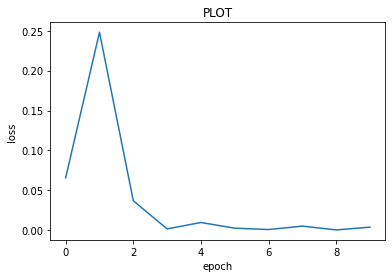

In [ ]:
mlp = SimpleMLP()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()

import time
loss_c = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.1)
# scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=0.1)
# scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# def lr_lambda(epoch):
#     return 1 - (epoch / EPOCHS)
# scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)

lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    start = time.process_time()
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())
    print(time.process_time() - start)


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()

  0%|          | 0/10 [00:28<?, ?it/s]


Loss:  0.032000161707401276
Loss:  0.10911334306001663
Loss:  0.005762399174273014
Loss:  0.06167719140648842
Loss:  0.029891574755311012
Loss:  0.00024212032440118492
Loss:  0.009099292568862438
Loss:  0.00010910705896094441
Loss:  0.0027403077110648155
Loss:  0.0006794354412704706
[8, 3, 0, 7, 3, 7, 0, 0, 2, 7, 9, 6, 0, 6, 9, 7, 6, 5, 7, 8, 5, 1, 6, 7, 8, 4, 8, 8, 6, 2, 9, 7, 8, 2, 8, 2, 1, 2, 1, 7, 7, 8, 4, 0, 2, 6, 5, 7, 7, 5, 0, 8, 7, 7, 0, 4, 3, 1, 5, 4, 5, 1, 6, 8, 5, 3, 2, 2, 8, 3, 7, 3, 3, 0, 6, 9, 7, 7, 4, 5, 0, 3, 4, 6, 7, 4, 1, 0, 3, 9, 1, 1, 8, 0, 9, 3, 0, 9, 1, 2, 4, 7, 1, 0, 0, 3, 4, 6, 3, 1, 4, 6, 1, 4, 6, 3, 3, 1, 0, 5, 0, 4, 7, 3, 1, 3, 1, 2, 9, 5, 5, 4, 2, 5, 2, 5, 8, 5, 1, 0, 6, 4, 7, 0, 0, 6, 3, 0, 6, 6, 1, 6, 2, 3, 2, 6, 1, 1, 1, 1, 0, 0, 9, 1, 3, 4, 4, 6, 7, 7, 9, 4, 2, 6, 9, 9, 4, 1, 1, 4, 9, 1, 7, 4, 9, 0, 9, 2, 9, 6, 1, 0, 1, 1, 1, 0, 2, 4, 8, 1, 6, 8, 1, 2, 7, 0, 7, 8, 8, 6, 2, 8, 3, 8, 7, 9, 9, 3, 8, 7, 2, 5, 7, 0, 2, 5, 2, 8, 0, 3, 4, 2, 4, 6, 5, 1, 9, 1, 2

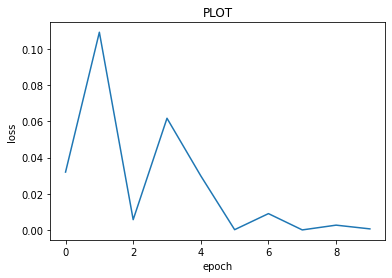

In [ ]:
mlp = SimpleMLP()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()


loss_c = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

# scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.1)
# scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=0.1)
# scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

def lr_lambda(epoch):
    return 1 - (epoch / EPOCHS)
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)

lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()

No scheduler is better as such it all depends on the dat and the situation we are carrying the experiment for me all performed almost the same but exponentialLR gave the maximum accuracy.

### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [ ]:
# code here
class SimpleMLP_WITH_BATCHNORM(nn.Module):
    def __init__(self,shape = 784, no_of_output=10):
        super(SimpleMLP_WITH_BATCHNORM,self).__init__()
        # code here
        self.dense1 = nn.Linear(shape, 400)
        self.relu1 = nn.ReLU()
        self.dense2 = nn.Linear(400, 200)
        self.relu2 = nn.ReLU()
        self.dense3 = nn.Linear(200, 50)
        self.relu3 = nn.ReLU()
        # self.dense4 = nn.Linear(100, 50)
        # self.relu4 = nn.ReLU()
        self.dense5 = nn.Linear(50, no_of_output)

    def forward(self,img):
        # code here
       
        # output = self.dense1(img.flatten())
        output = self.dense1(img.view(-1, 784))
        output = self.relu1(output)
        output = self.dense2(output)
        output = self.relu2(output)
        output = self.dense3(output)
        output = self.relu3(output)
        # output = self.dense4(output)
        # output = self.relu4(output)
        output = self.dense5(output)
        return output


  0%|          | 0/10 [03:18<?, ?it/s]


Loss:  0.5536102056503296
Loss:  0.17877182364463806
Loss:  0.40332359075546265
Loss:  0.11668194085359573
Loss:  0.2847035229206085
Loss:  0.05398981645703316
Loss:  0.5178453326225281
Loss:  0.23443350195884705
Loss:  0.08522174507379532
Loss:  0.162557452917099
[9, 5, 3, 9, 8, 3, 7, 0, 6, 6, 4, 4, 2, 4, 3, 7, 9, 5, 6, 6, 0, 1, 7, 3, 0, 8, 5, 9, 7, 1, 4, 3, 6, 3, 4, 0, 1, 7, 1, 2, 9, 5, 4, 5, 8, 7, 9, 1, 0, 5, 0, 5, 8, 3, 4, 8, 7, 6, 6, 8, 4, 5, 5, 8, 4, 7, 8, 7, 5, 8, 9, 4, 3, 5, 6, 4, 5, 0, 3, 9, 4, 9, 9, 8, 1, 9, 4, 8, 6, 4, 2, 6, 1, 6, 1, 7, 6, 2, 3, 3, 8, 8, 8, 7, 1, 3, 5, 2, 6, 0, 8, 9, 6, 9, 5, 5, 0, 9, 8, 3, 9, 1, 9, 5, 2, 2, 5, 6, 9, 1, 2, 2, 1, 8, 6, 8, 3, 4, 1, 1, 1, 8, 5, 6, 9, 7, 6, 0, 8, 6, 3, 2, 0, 8, 8, 9, 3, 3, 5, 3, 0, 4, 3, 8, 1, 1, 1, 8, 8, 6, 4, 3, 6, 6, 4, 1, 6, 5, 9, 9, 9, 3, 5, 4, 7, 8, 4, 4, 2, 4, 2, 0, 7, 4, 6, 8, 8, 4, 9, 7, 2, 1, 4, 0, 1, 2, 2, 8, 4, 3, 6, 7, 6, 9, 2, 4, 0, 7, 9, 6, 2, 3, 6, 6, 8, 6, 0, 6, 9, 9, 3, 4, 4, 0, 0, 7, 5, 9, 7, 2, 6, 8, 9, 2, 0,

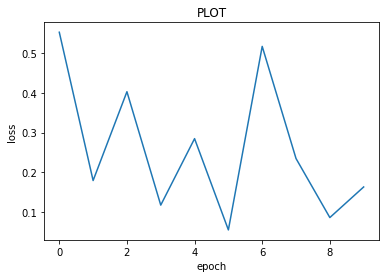

In [ ]:
# code and analysis here
import torch.optim.lr_scheduler as lr_scheduler

mlp = SimpleMLP_WITH_BATCHNORM()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()

loss_c = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.1)
# scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=0.1)
# scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.67)

# def lr_lambda(epoch):
#     return 1 - (epoch / EPOCHS)
# scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in testloader:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()
  

In [ ]:
true_count, false_count = 0, 0

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    for temp in yhat:
        if(temp.argmax(axis=0) == targets[index]):
            true_count += 1
        else: 
            false_count += 1
        index+=1
print(true_count, false_count)
print("ACCURACY : ", true_count/(true_count + false_count))

9787 213
ACCURACY :  0.9787


In [ ]:
# code here
class SimpleMLP_WITH_DROPOUT(nn.Module):
    def __init__(self,shape = 784, no_of_output=10, p=0.4):
        super(SimpleMLP_WITH_DROPOUT,self).__init__()
        # code here
        self.dense1 = nn.Linear(shape, 400)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=p)
        self.dense2 = nn.Linear(400, 200)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=p)
        self.dense3 = nn.Linear(200, 50)
        self.relu3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=p)
        # self.relu4 = nn.ReLU()
        self.dense5 = nn.Linear(50, no_of_output)

    def forward(self,img):
        # code here
       
        # output = self.dense1(img.flatten())
        output = self.dense1(img.view(-1, 784))
        # output = self.batch_norm1(output)
        output = self.relu1(output)
        output = self.drop1(output)
        output = self.dense2(output)
        # output = self.batch_norm2(output)
        output = self.relu2(output)
        output = self.drop2(output)
        output = self.dense3(output)
        # output = self.batch_norm3(output)
        output = self.relu3(output)
        output = self.drop3(output)
        # output = self.dense4(output)
        # output = self.relu4(output)
        output = self.dense5(output)
        return output


  0%|          | 0/10 [03:22<?, ?it/s]


Loss:  0.17398008704185486
Loss:  0.03855941817164421
Loss:  0.09083358943462372
Loss:  0.04062256962060928
Loss:  0.11218630522489548
Loss:  0.03469528630375862
Loss:  0.016690783202648163
Loss:  0.006442665588110685
Loss:  0.06223367154598236
Loss:  0.007486455142498016
[8, 1, 8, 6, 0, 2, 4, 4, 2, 7, 9, 1, 9, 5, 8, 6, 6, 0, 2, 1, 4, 4, 7, 9, 8, 6, 1, 9, 5, 3, 5, 7, 2, 8, 3, 5, 3, 8, 1, 6, 7, 1, 1, 6, 3, 2, 4, 8, 0, 1, 8, 0, 0, 2, 4, 7, 5, 8, 2, 9, 8, 3, 8, 8, 4, 3, 2, 7, 0, 1, 6, 2, 4, 5, 0, 5, 8, 6, 6, 1, 2, 2, 2, 4, 4, 9, 0, 9, 6, 1, 2, 1, 1, 7, 7, 5, 0, 4, 8, 6, 5, 6, 5, 2, 8, 9, 3, 4, 4, 4, 1, 1, 6, 6, 1, 2, 1, 2, 9, 4, 6, 8, 5, 3, 4, 2, 0, 4, 1, 9, 0, 0, 9, 8, 7, 9, 3, 8, 2, 7, 3, 1, 8, 4, 9, 9, 8, 9, 0, 3, 0, 4, 8, 6, 7, 0, 9, 0, 3, 0, 5, 0, 3, 7, 3, 7, 4, 3, 5, 6, 4, 1, 1, 3, 3, 6, 1, 0, 0, 3, 1, 7, 8, 1, 1, 3, 7, 3, 8, 9, 5, 7, 9, 6, 9, 3, 7, 9, 0, 5, 1, 5, 7, 1, 9, 5, 5, 9, 3, 9, 8, 0, 4, 8, 7, 8, 2, 8, 3, 0, 1, 9, 6, 2, 4, 7, 9, 6, 9, 0, 9, 5, 7, 0, 6, 7, 0, 0, 8, 9, 9, 9, 

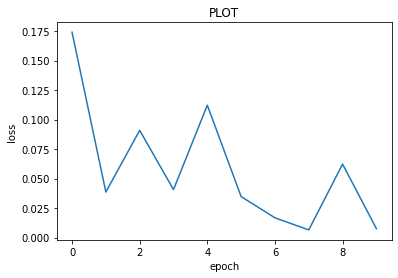

In [ ]:
# code and analysis here
import torch.optim.lr_scheduler as lr_scheduler

mlp = SimpleMLP_WITH_DROPOUT()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()

loss_c = nn.CrossEntropyLoss()
 
# Define the SGD optimizer with a learning rate of 0.01
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

# scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.1)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[2, 6], gamma=0.1)
# scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# def lr_lambda(epoch):
#     return 1 - (epoch / EPOCHS)
# scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()
  

In [ ]:
true_count, false_count = 0, 0

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    for temp in yhat:
        if(temp.argmax(axis=0) == targets[index]):
            true_count += 1
        else: 
            false_count += 1
        index+=1
print(true_count, false_count)
print("ACCURACY : ", true_count/(true_count + false_count))

9662 338
ACCURACY :  0.9662


In [ ]:
# code here
class SimpleMLP_WITH_BOTH(nn.Module):
    def __init__(self,shape = 784, no_of_output=10, p=0.4):
        super(SimpleMLP_WITH_BOTH,self).__init__()
        # code here
        self.dense1 = nn.Linear(shape, 400)
        self.batch_norm1 = nn.BatchNorm1d(num_features=400)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=p)
        self.dense2 = nn.Linear(400, 200)
        self.batch_norm2 = nn.BatchNorm1d(num_features=200)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=p)
        self.dense3 = nn.Linear(200, 50)
        self.batch_norm3 = nn.BatchNorm1d(num_features=50)
        self.relu3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=p)
        # self.dense4 = nn.Linear(100, 50)
        # self.relu4 = nn.ReLU()
        self.dense5 = nn.Linear(50, no_of_output)

    def forward(self,img):
        # code here
       
        # output = self.dense1(img.flatten())
        output = self.dense1(img.view(-1, 784))
        output = self.batch_norm1(output)
        output = self.relu1(output)
        output = self.drop1(output)
        output = self.dense2(output)
        output = self.batch_norm2(output)
        output = self.relu2(output)
        output = self.drop2(output)
        output = self.dense3(output)
        output = self.batch_norm3(output)
        output = self.relu3(output)
        output = self.drop3(output)
        # output = self.dense4(output)
        # output = self.relu4(output)
        output = self.dense5(output)
        return output


  0%|          | 0/10 [02:48<?, ?it/s]


Loss:  0.39292412996292114
Loss:  0.28218528628349304
Loss:  0.29539722204208374
Loss:  0.43537282943725586
Loss:  0.10193658620119095
Loss:  0.25040948390960693
Loss:  0.1520245373249054
Loss:  0.025406718254089355
Loss:  0.28604379296302795
Loss:  0.0601789727807045
[0, 2, 6, 3, 0, 6, 8, 3, 4, 1, 9, 5, 0, 6, 1, 4, 1, 0, 8, 6, 4, 4, 6, 7, 5, 7, 9, 5, 9, 4, 9, 9, 4, 9, 1, 5, 0, 9, 3, 1, 0, 1, 4, 8, 4, 9, 6, 0, 8, 8, 2, 7, 9, 5, 2, 9, 3, 7, 6, 1, 6, 5, 2, 0, 1, 4, 7, 1, 4, 9, 1, 7, 7, 7, 7, 7, 0, 4, 6, 6, 1, 8, 2, 5, 2, 2, 7, 9, 3, 4, 7, 8, 2, 8, 1, 0, 0, 1, 6, 7, 0, 7, 9, 9, 8, 8, 3, 2, 1, 9, 6, 2, 2, 3, 3, 6, 9, 8, 5, 3, 2, 4, 8, 6, 7, 1, 1, 1, 5, 7, 5, 7, 1, 7, 5, 8, 0, 5, 8, 2, 2, 0, 2, 5, 6, 3, 7, 0, 5, 7, 9, 8, 9, 2, 4, 7, 7, 0, 0, 6, 4, 8, 6, 6, 0, 2, 5, 7, 3, 8, 3, 5, 0, 9, 2, 1, 8, 7, 9, 4, 3, 6, 5, 3, 9, 7, 2, 2, 1, 0, 7, 0, 3, 1, 6, 1, 1, 1, 3, 1, 4, 1, 1, 4, 3, 2, 0, 2, 0, 6, 1, 6, 4, 0, 7, 1, 3, 9, 2, 3, 8, 4, 4, 3, 2, 2, 5, 7, 3, 8, 3, 5, 6, 8, 1, 5, 3, 5, 7, 4, 3, 8, 5, 2

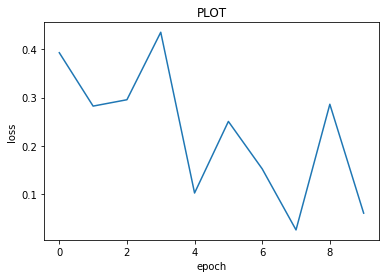

In [ ]:
# code and analysis here
import torch.optim.lr_scheduler as lr_scheduler

mlp = SimpleMLP_WITH_BOTH()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()

sgd_optimizer = optim.SGD(mlp.parameters(), lr=0.01)
sgd_optimizer_with_momentum = optim.SGD(mlp.parameters(), lr=0.01, momentum=0.9)
sgd_with_l2 = optim.SGD(mlp.parameters(), lr=0.01, weight_decay=0.001)
# rmsprop = 

loss_c = nn.CrossEntropyLoss()
 
optimizer = sgd_optimizer_with_momentum

# scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.1)
# scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=0.1)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# def lr_lambda(epoch):
#     return 1 - (epoch / EPOCHS)
# scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()
  

They all performed better than mlp as they have more ability as compared to mlp oin  learning and fitting over the given data in a much better way.

### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

In [ ]:
loss_c = nn.CrossEntropyLoss()
import time
mlp = 0
mlp = SimpleMLP_WITH_BOTH()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    start = time.process_time()
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())
    print("At epoch :",epoch, "Time taken :", time.process_time() - start)

# true_count, false_count = 0, 0

y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))

# plt.plot(lst1, lst2)
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.title('PLOT')
# plt.show()



  0%|          | 0/10 [03:10<?, ?it/s]


Loss:  0.30375415086746216
At epoch : 0 Time taken : 14.635248843999989
Loss:  0.1665477454662323
At epoch : 1 Time taken : 15.244981300000063
Loss:  0.08663321286439896
At epoch : 2 Time taken : 15.279774227999951
Loss:  0.12498097121715546
At epoch : 3 Time taken : 15.487715066000078
Loss:  0.9554840326309204
At epoch : 4 Time taken : 14.812492051999925
Loss:  0.07124070823192596
At epoch : 5 Time taken : 15.457224408000002
Loss:  0.03830260410904884
At epoch : 6 Time taken : 15.103996810000012
Loss:  0.3610767424106598
At epoch : 7 Time taken : 14.744061342999998
Loss:  0.02500385046005249
At epoch : 8 Time taken : 14.816211206000048
Loss:  0.043057702481746674
At epoch : 9 Time taken : 14.914676038999914
[6, 0, 7, 6, 1, 6, 2, 3, 7, 6, 1, 0, 3, 5, 4, 8, 9, 2, 5, 9, 4, 9, 0, 1, 5, 6, 5, 4, 1, 1, 2, 1, 0, 6, 0, 0, 8, 2, 7, 1, 8, 9, 7, 6, 5, 0, 9, 4, 9, 1, 7, 8, 7, 3, 0, 9, 8, 4, 2, 9, 9, 5, 9, 0, 8, 9, 3, 2, 1, 4, 8, 1, 1, 0, 3, 2, 2, 6, 4, 2, 9, 2, 7, 1, 0, 1, 8, 1, 7, 5, 2, 8, 3, 8,

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

  0%|          | 0/10 [01:27<?, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
Exception ignored in: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():<function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError
: Traceback (most recent call last):
can only test a child process  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

    self._shutdown_workers()Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>  File "/usr/local/lib/pytho

Loss:  0.4362129867076874


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
    self._shutdown_workers()  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
self._shutdown_workers()    assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    : if w.is_alive():can only test a child process

Exception ignored in: 

Loss:  0.10107801109552383


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: can only test a child process<function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>

Traceback (most recent call last):
Exception ignored in:   File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/local/lib/python3

Loss:  0.030834833160042763


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
self._shutdown_workers()
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child

Loss:  0.014119967818260193


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>self._shutdown_workers()
Traceback (most recent call last):

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
self._shutdown_workers()    
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a c

Loss:  0.05246434360742569


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

self._shutdown_workers()        
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

if w.is_alive():  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
        if w.is_alive():assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError
: can only test a child process  File "/usr/lib/python

Loss:  0.0017992755165323615


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30><function _MultiProcessingDataLoaderIter.__del__ at 0x7f48ced7dd30>
Traceback (most recent call last):

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
self._shutdown_workers()    
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
      File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a child

Loss:  0.003743861336261034
Loss:  0.018151473253965378
Loss:  0.0027119144797325134
Loss:  6.132103590061888e-05
[2, 1, 3, 4, 8, 4, 3, 8, 1, 2, 5, 8, 2, 3, 1, 1, 8, 9, 0, 1, 1, 6, 7, 3, 7, 8, 9, 4, 6, 1, 3, 0, 1, 0, 5, 5, 2, 0, 6, 6, 6, 2, 5, 4, 0, 0, 3, 1, 3, 5, 5, 0, 0, 5, 9, 6, 4, 9, 9, 3, 2, 8, 6, 6, 0, 2, 5, 3, 4, 7, 3, 3, 3, 9, 2, 0, 7, 4, 8, 6, 0, 5, 1, 4, 2, 3, 9, 1, 6, 6, 5, 2, 3, 5, 1, 3, 6, 7, 0, 3, 8, 2, 4, 8, 9, 2, 1, 2, 3, 6, 0, 3, 9, 7, 8, 0, 3, 2, 5, 2, 6, 3, 9, 2, 0, 1, 9, 6, 0, 6, 1, 1, 9, 9, 8, 9, 0, 3, 9, 1, 1, 3, 4, 6, 7, 9, 8, 7, 6, 1, 6, 5, 9, 8, 6, 2, 3, 4, 8, 1, 1, 1, 2, 6, 7, 6, 4, 5, 3, 7, 8, 9, 9, 6, 0, 6, 6, 9, 6, 9, 1, 1, 2, 3, 6, 8, 2, 0, 0, 9, 6, 9, 4, 5, 4, 9, 2, 1, 9, 0, 3, 6, 3, 7, 9, 4, 0, 2, 3, 8, 5, 8, 6, 7, 2, 8, 4, 0, 8, 6, 0, 0, 2, 2, 1, 9, 7, 3, 3, 2, 2, 6, 9, 5, 8, 3, 8, 6, 8, 2, 1, 0, 3, 9, 3, 4, 3, 9, 4, 9, 7, 8, 1, 9, 3, 8, 2, 5, 2, 9, 4, 3, 0, 4, 7, 7, 3, 5, 0, 4, 8, 8, 4, 3, 3, 0, 2, 6, 8, 2, 9, 0, 8, 0, 2, 9, 9, 6, 3, 8, 8, 2, 2, 3, 4, 

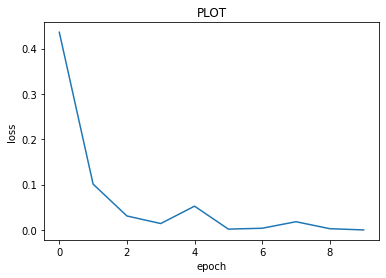

In [ ]:
# code here
# code and analysis here
import torch.optim.lr_scheduler as lr_scheduler

mlp = SimpleMLP()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()


loss_c = nn.CrossEntropyLoss()
 
# Define the SGD optimizer with a learning rate of 0.01
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

# scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.1)
# scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=0.1)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# def lr_lambda(epoch):
#     return 1 - (epoch / EPOCHS)
# scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    start = time.process_time()
    for data, target in trainloader_minibatch:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())
    print("At epoch :",epoch, "Time taken :", time.process_time() - start)


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))

plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()
  

  0%|          | 0/10 [02:34<?, ?it/s]


Loss:  0.0004866131057497114
Loss:  1.1920928244535389e-07
Loss:  7.152555099310121e-07
Loss:  8.106198947643861e-06
Loss:  0.0666499212384224
Loss:  2.3841855067985307e-07
Loss:  0.18142841756343842
Loss:  0.0
Loss:  2.753696753643453e-05
Loss:  0.0
[6, 3, 1, 8, 6, 9, 4, 5, 6, 9, 1, 8, 3, 5, 7, 6, 9, 7, 5, 0, 7, 2, 5, 0, 6, 1, 7, 7, 4, 1, 7, 4, 3, 4, 4, 9, 1, 2, 5, 3, 6, 8, 0, 2, 1, 1, 4, 5, 9, 0, 8, 6, 0, 2, 6, 3, 7, 8, 3, 5, 1, 2, 9, 9, 2, 7, 2, 7, 7, 1, 2, 5, 5, 8, 2, 8, 4, 2, 2, 5, 3, 5, 7, 6, 0, 8, 8, 6, 5, 5, 1, 9, 3, 3, 6, 6, 5, 4, 2, 7, 3, 1, 0, 4, 3, 1, 2, 2, 6, 3, 2, 0, 7, 1, 8, 3, 6, 9, 8, 0, 6, 8, 2, 4, 7, 5, 6, 1, 4, 2, 9, 4, 0, 1, 4, 1, 5, 8, 0, 6, 4, 0, 3, 5, 0, 5, 5, 2, 3, 4, 3, 3, 0, 2, 1, 0, 3, 3, 3, 1, 2, 4, 3, 5, 4, 9, 4, 1, 9, 7, 5, 4, 3, 3, 9, 6, 6, 3, 5, 7, 1, 4, 3, 7, 6, 8, 9, 0, 3, 2, 8, 7, 9, 6, 1, 0, 3, 4, 7, 5, 9, 1, 0, 4, 2, 0, 1, 6, 9, 3, 3, 1, 9, 7, 4, 4, 1, 4, 0, 0, 3, 4, 4, 3, 3, 5, 8, 0, 8, 0, 0, 1, 0, 9, 7, 9, 9, 6, 2, 8, 1, 4, 9, 8, 1, 1, 9, 4, 4, 9

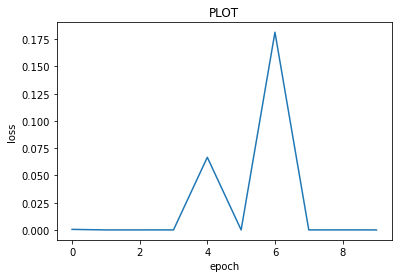

In [ ]:
# code here
# code and analysis here
import torch.optim.lr_scheduler as lr_scheduler

mlp = SimpleMLP()
import torch.optim as optim
loss_crossentropy = nn.CrossEntropyLoss()


loss_c = nn.CrossEntropyLoss()
 
# Define the SGD optimizer with a learning rate of 0.01
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3, weight_decay=1e-5)

# scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lambda epoch: 0.1)
# scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10], gamma=0.1)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# def lr_lambda(epoch):
#     return 1 - (epoch / EPOCHS)
# scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

EPOCHS = 10
mlp.train()
out = 0
pbar = tqdm(total=EPOCHS)
lst1 = []
lst2 = []
for epoch in range(EPOCHS):
    start = time.process_time()
    for data, target in trainloader_stochastic:
        optimizer.zero_grad()
        out = mlp(data)
        loss = loss_c(out, target)
        loss.backward()
        optimizer.step() 
    scheduler.step()
    print('Loss: ' ,loss.item())
    lst1.append(epoch)
    lst2.append(loss.item())
    print("At epoch :",epoch, "Time taken :", time.process_time() - start)


y_pred = []
y_real = []

for i, (inputs, targets) in enumerate(testloader):
    yhat = mlp(inputs.view(-1, 784))
    yhat = yhat.detach().numpy()
    index=0
    # y_pred.extend(yhat)
    y_real.extend(targets)
    for temp in yhat:
        y_pred.append(temp.argmax(axis=0))
    

print(y_pred)
print(y_real)
print("ACCURACY : ", accuracy_score(y_pred, y_real))
print("F1 SCORE : ", f1_score(y_pred, y_real, average=None))
plt.plot(lst1, lst2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('PLOT')
plt.show()
  

Stochastic takes a lot more time than Mini-batch as it updated the weights in every loop but mini batch updates after each batch in stochastic weights are updated many times during a single epoch of training which leads to faster convergence but also introduces lot of noise into the weight updates. 

Mini-batch training can reduce the noise introduced by stochastic training, while still maintaining a reasonable rate of convergence.
hence improving overall performance timewise and convergence wise.

so in practice we uses mini batch as it converges fast and leads to less noise.

### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

Out of BatchNorm, Dropout, BatchNorm with Dropout is BatchNorm with Dropout performing slightly better than dropout but much better batchnorm only.
Both BatchNorm and Dropout are commonly used regularization techniques in deep learning

BatchNorm normalizes inputs of each layer to tackle the internal covariate shift problem that can lead to improved stability and convergence during training and also enhance generalization performance.

Dropout randomly removes some of the units in the network during training, creating a smaller network. This can prevent overfitting by adding some regularization limiting the network's ability to remember noise in the training data.

Combination of BatchNorm and Dropout offered better regularization by adding regularization or tackling different types of overfitting. For instance, BatchNorm can reduce overfitting caused by internal covariate shift, while Dropout can reduce overfitting caused by the network's tendency to memorize noise in the training data.

In [ ]:
# text here
